## Breanna George submission
### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [15]:
#data = pd.read_csv('data/coupons.csv')
#I saved this locally on my machine:
data = pd.read_csv(r'C:\Users\brean\Documents\BerkAIML\coupons.csv')

In [17]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [19]:
# Checking information on dataset
data_info = data.info()

# checking summary stats for the num columns 
data_describe = data.describe()

# checking for duplicate rows
duplicate_rows = data.duplicated().sum()

# checking unique value counts for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
unique_values = data[categorical_columns].nunique()

# checking for missing values
missing_values = data.isnull().sum()

data_info, data_describe, missing_values, duplicate_rows, unique_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

(None,
         temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
 count  12684.000000  12684.000000           12684.0       12684.000000   
 mean      63.301798      0.414144               1.0           0.561495   
 std       19.154486      0.492593               0.0           0.496224   
 min       30.000000      0.000000               1.0           0.000000   
 25%       55.000000      0.000000               1.0           0.000000   
 50%       80.000000      0.000000               1.0           1.000000   
 75%       80.000000      1.000000               1.0           1.000000   
 max       80.000000      1.000000               1.0           1.000000   
 
        toCoupon_GEQ25min  direction_same  direction_opp             Y  
 count       12684.000000    12684.000000   12684.000000  12684.000000  
 mean            0.119126        0.214759       0.785241      0.568433  
 std             0.323950        0.410671       0.410671      0.495314  
 min             0.00000

3. Decide what to do about your missing data -- drop, replace, other...

In [21]:
# droping the 'car' column
data = data.drop(columns=['car'])

# replacing missing values with the mode in relevant columns
imputecolumns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in imputecolumns:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# check now that there are no more missing values
missing_values_chk = data.isnull().sum()

missing_values_chk


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [29]:
# get the # of observations where the coupon was accepted  
coupon_accepted = data['Y'].sum()

# get the total number of observations
tot_obs = data.shape[0]

# get the proportion
proportion_accepted = coupon_accepted / tot_obs

print(f"Proportion of observations that accepted the coupon: {proportion_accepted:.2f}")

Proportion of observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

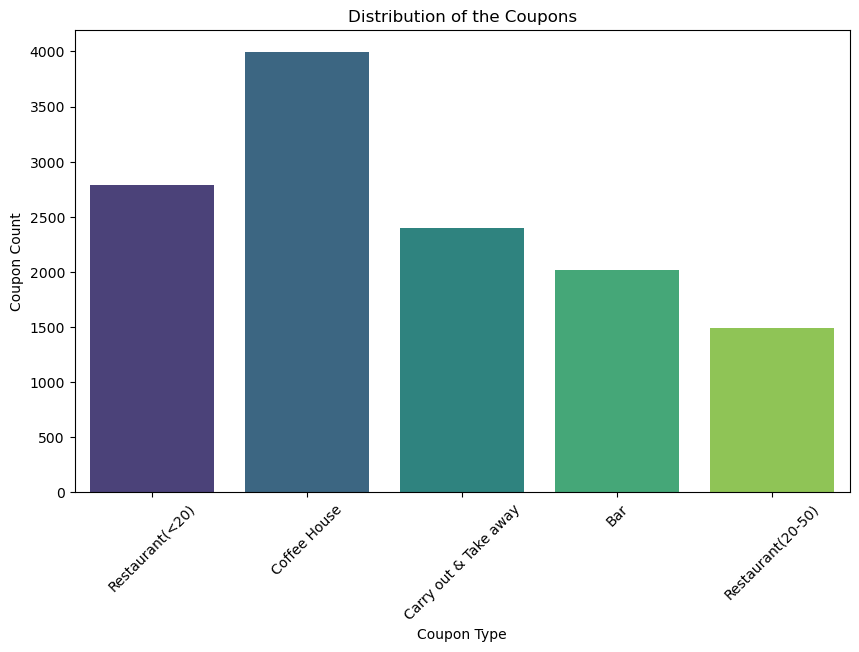

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon', palette='viridis')
plt.title('Distribution of the Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Coupon Count')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

C:\Users\brean\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


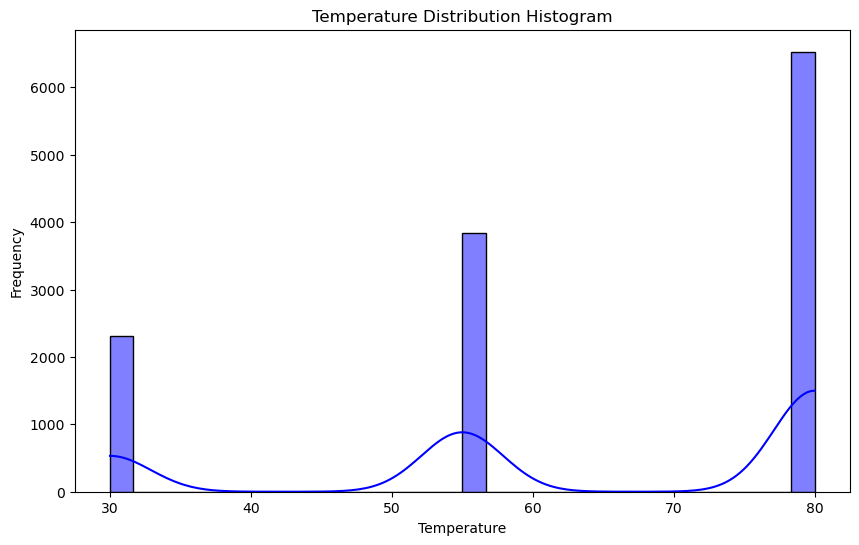

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], kde=True, bins=30, color='blue')
plt.title('Temperature Distribution Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [41]:
bar_coupons = data[data['coupon'] == 'Bar']
print(bar_coupons)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [78]:
# get the # of observations where the coupon was accepted  
bcoupon_accepted = bar_coupons['Y'].sum()

# get the total number of observations
tot_bobs = bar_coupons.shape[0]

# get the proportion
bproportion_accepted = bcoupon_accepted / tot_bobs

print(f"Proportion of bar observations that accepted the coupon: {bproportion_accepted:.2%}")

Proportion of bar observations that accepted the coupon: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [58]:
def acceptance_rate(bar_coupons):
    return bar_coupons['Y'].mean()

le3 = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
mt3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

rate_less_equal_3 = acceptance_rate(le3)
rate_more_than_3 = acceptance_rate(mt3)

print("Acceptance rate for those who went to a bar 3 or fewer times a month:", rate_less_equal_3)
print("Acceptance rate for those who went to a bar more than 3 times a month:", rate_more_than_3)


Acceptance rate for those who went to a bar 3 or fewer times a month: 0.37073707370737075
Acceptance rate for those who went to a bar more than 3 times a month: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [98]:
sub_1 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons['age'] > '25')]
sub_2 = bar_coupons[~((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons['age'] > '25'))]
acceptrtsub1 = sub_1['Y'].mean()
acceptrtsub2 = sub_2['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar >= 1 time a month and are > age 25: {acceptrtsub1:.2%}")
print(f"Acceptance rate for all other drivers: {acceptrtsub2:.2%}")
print(f"Is there a difference?: Yes")

Acceptance rate for drivers who go to a bar >= 1 time a month and are > age 25: 68.84%
Acceptance rate for all other drivers: 33.46%
Is there a difference?: Yes


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [104]:
s1 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons['passanger'] != 'Kid(s)') & 
    (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))
]
s2 = bar_coupons[
    ~(
        (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
        (bar_coupons['passanger'] != 'Kid(s)') & 
        (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))
    )
]

# Calculate acceptance rates
acceptance_rate_subset_1 = s1['Y'].mean()
acceptance_rate_subset_2 = s2['Y'].mean()

print(f"Acceptance rate for drivers who go to bars >= 1 time a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {acceptance_rate_subset_1:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_subset_2:.2%}")

Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 71.32%
Acceptance rate for all other drivers: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [152]:
def acceptance_rate(data):
    return data['Y'].mean()

# Filter groups
group_1 = data[(data['Bar'].isin(['2~3', '4~8', 'gt8'])) & 
                      (data['passanger'] != 'Kid(s)') & 
                      (data['maritalStatus'] != 'Widowed')]

group_2 = data[(data['Bar'].isin(['2~3', '4~8', 'gt8'])) & 
                      (data['age'] < '30')]

group_3 = data[(data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
                       (data['income'] < '$50000')]

# Calculate acceptance rates
rate_group_1 = acceptance_rate(group_1)
rate_group_2 = acceptance_rate(group_2)
rate_group_3 = acceptance_rate(group_3)

print("Acceptance rate of those who go to bars more than once a month, had passengers that were not a kid, and were not widowed (group 1):", rate_group_1)
print("Acceptance rate of those who go to bars more than once a month and are under the age of 30 (group 2):", rate_group_2)
print("Acceptance rate of those who go to cheap restaurants more than 4 times a month and income is less than 50K (group 3):", rate_group_3)

Acceptance rate of those who go to bars more than once a month, had passengers that were not a kid, and were not widowed (group 1): 0.6223826714801444
Acceptance rate of those who go to bars more than once a month and are under the age of 30 (group 2): 0.6475583864118896
Acceptance rate of those who go to cheap restaurants more than 4 times a month and income is less than 50K (group 3): 0.6002928257686676


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Those who go to bars more than once a month and are under the age of 30 are more likely to accept bar coupons. Younger individuals might be more inclined to accept bar coupons, possibly due to a higher tendency to socialize and try new things compared to older individuals.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [219]:
#Explore the gender stat differences in the dataset. See visualizations below.

# first filtering the DataFrame to contain only females
gender_data = data[data['gender'] == 'Female']

row_count = gender_data.shape[0]


print(f"Number of females: {row_count}")

Number of females: 6511


In [183]:
destination_counts = gender_data['destination'].value_counts()
time_counts = gender_data['time'].value_counts()
passenger_counts = gender_data['passanger'].value_counts()

print("Value counts for destination:")
print(destination_counts)
print("\nValue counts for time of day:")
print(time_counts)
print("\nValue counts for passengers:")
print(passenger_counts)

Value counts for destination:
destination
No Urgent Place    3205
Home               1687
Work               1619
Name: count, dtype: int64

Value counts for time of day:
time
6PM     1669
7AM     1619
10AM    1153
2PM     1042
10PM    1028
Name: count, dtype: int64

Value counts for passengers:
passanger
Alone        3715
Friend(s)    1634
Kid(s)        614
Partner       548
Name: count, dtype: int64


In [185]:
# Filter the DataFrame to contain only males 
male_gender_data = data[data['gender'] == 'Male']

row_count = male_gender_data.shape[0]


print(f"Number of males: {row_count}")

Number of males: 6173


In [192]:
m_destination_counts = male_gender_data['destination'].value_counts()
m_time_counts = male_gender_data['time'].value_counts()
m_passenger_counts = male_gender_data['passanger'].value_counts()

print("Value counts for destination:")
print(m_destination_counts)
print("\nValue counts for time of day:")
print(m_time_counts)
print("\nValue counts for passengers:")
print(m_passenger_counts)

Value counts for destination:
destination
No Urgent Place    3078
Home               1550
Work               1545
Name: count, dtype: int64

Value counts for time of day:
time
6PM     1561
7AM     1545
10AM    1122
10PM     978
2PM      967
Name: count, dtype: int64

Value counts for passengers:
passanger
Alone        3590
Friend(s)    1664
Partner       527
Kid(s)        392
Name: count, dtype: int64


In [212]:
destination_acceptance = male_gender_data.groupby('destination')['Y'].mean()

# Calculate acceptance rates based on time of day
time_acceptance = male_gender_data.groupby('time')['Y'].mean()

# Calculate acceptance rates based on passengers
passenger_acceptance = male_gender_data.groupby('passanger')['Y'].mean()
 

destination_acceptance2 = gender_data.groupby('destination')['Y'].mean()

# Calculate acceptance rates based on time of day
time_acceptance2 = gender_data.groupby('time')['Y'].mean()

# Calculate acceptance rates based on passengers
passenger_acceptance2 = gender_data.groupby('passanger')['Y'].mean()
 

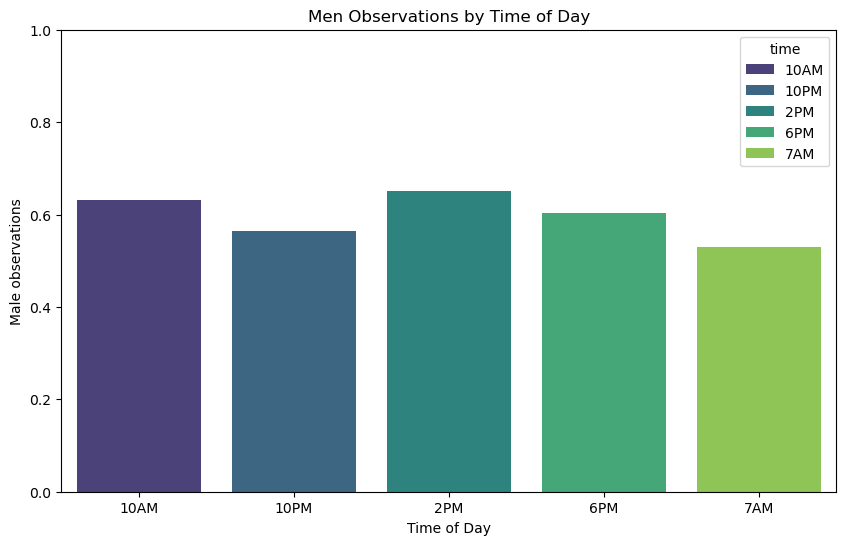

In [214]:
plt.figure(figsize=(10, 6))
sns.barplot(x=time_acceptance.index, y=time_acceptance.values, hue=time_acceptance.index, palette="viridis", dodge=False)
plt.title('Men Observations by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Male observations')
plt.ylim(0, 1)
plt.show()

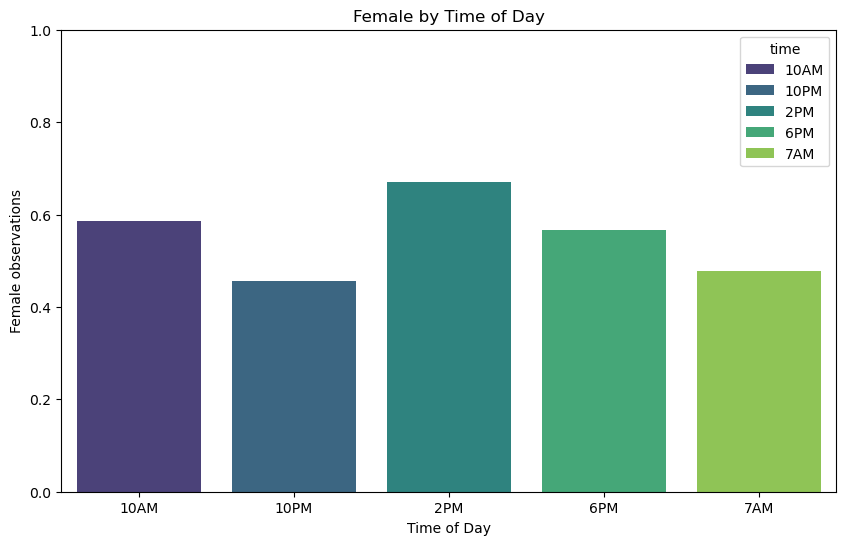

In [216]:
plt.figure(figsize=(10, 6))
sns.barplot(x=time_acceptance2.index, y=time_acceptance2.values, hue=time_acceptance2.index, palette="viridis", dodge=False)
plt.title('Female by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Female observations')
plt.ylim(0, 1)
plt.show()

It appears both men and women mimic similar time behavior however a higher percentage of men are observed earlier in the day and a higher percentage of women are observed in the middle of the day.